In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Specify the file path to the CSV file
csv_file_path = r'C:\Users\btrok\OneDrive\BBall Project\preprocessed_data.csv'

# Load the CSV file into a DataFrame, specifying the encoding
# Try different encodings such as 'utf-16', 'latin1', 'cp1252', etc.
df = pd.read_csv(csv_file_path)

In [28]:
import re
# Remove numbers
df['Headline'] = df['Headline'].apply(lambda text: re.sub(r'\d+', '', text))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame

# Split the dataset
train_df = df[df['Year'] != 2024]
test_df = df[df['Year'] == 2024]

# Preprocess the text data
vectorizer = TfidfVectorizer()
tfidf_matrix_train = vectorizer.fit_transform(train_df['PlusMinus'])
tfidf_matrix_test = vectorizer.transform(test_df['PlusMinus'])

# Initialize variables to store results
n_components_list = [10, 20, 30, 40, 50]
map_scores = []

# Iterate over different values of n_components
for n_components in n_components_list:
    # Apply LSA
    lsa = TruncatedSVD(n_components=n_components)
    lsa_matrix_train = lsa.fit_transform(tfidf_matrix_train)
    lsa_matrix_test = lsa.transform(tfidf_matrix_test)
    
    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(lsa_matrix_test, lsa_matrix_train)
    
    # Calculate Mean Average Precision (MAP)
    map_score = np.mean([np.mean(similarity) for similarity in similarity_matrix])
    map_scores.append(map_score)

# Print the MAP scores for each value of n_components
for n_components, map_score in zip(n_components_list, map_scores):
    print(f"n_components: {n_components}, MAP Score: {map_score}")

# Choose the best number of components based on the maximum MAP score
best_n_components = n_components_list[np.argmax(map_scores)]
print(f"Best number of components: {best_n_components}")


n_components: 10, MAP Score: 0.7227965645426428
n_components: 20, MAP Score: 0.6209751574479271
n_components: 30, MAP Score: 0.555987735096393
n_components: 40, MAP Score: 0.5070619683221465
n_components: 50, MAP Score: 0.4691368402694328
Best number of components: 10


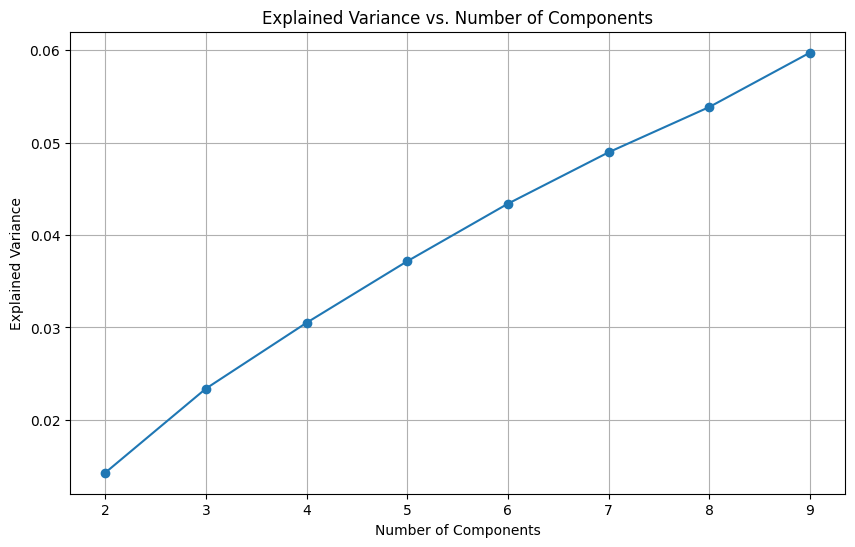

Suggested number of components: 7
Best number of components based on explained variance: 7


In [30]:
#Using explained variance to select optimal number of components

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['PlusMinus'])

# Test different numbers of components
n_components_list = range(2,10)  # Change as needed
explained_variances = []

for n_components in n_components_list:
    lsa = TruncatedSVD(n_components=n_components)
    lsa.fit(tfidf_matrix)
    explained_variances.append(np.sum(lsa.explained_variance_ratio_))

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the "elbow" point (you can adjust the criteria as needed)
elbow_point = np.argmax(np.diff(np.diff(explained_variances))) + 2
print(f"Suggested number of components: {elbow_point}")

# Best number of components based on explained variance
best_n_components = elbow_point
print(f"Best number of components based on explained variance: {best_n_components}")

n_components: 2, Coherence Score: 0.9095263239712201
n_components: 3, Coherence Score: 0.8529750086999708
n_components: 4, Coherence Score: 0.8132128209593881
n_components: 5, Coherence Score: 0.778549735976337
n_components: 6, Coherence Score: 0.7475113082810025
n_components: 7, Coherence Score: 0.722516701718087
n_components: 8, Coherence Score: 0.6996611820460013
n_components: 9, Coherence Score: 0.6794409917235592
n_components: 10, Coherence Score: 0.66017604185825
n_components: 11, Coherence Score: 0.6416535689304905
n_components: 12, Coherence Score: 0.6248317848809458
n_components: 13, Coherence Score: 0.6112703906687467
n_components: 14, Coherence Score: 0.5950897278111004
n_components: 15, Coherence Score: 0.5813168907961177
n_components: 16, Coherence Score: 0.5685049813368297
n_components: 17, Coherence Score: 0.5563965982889283
n_components: 18, Coherence Score: 0.5439039205039392
n_components: 19, Coherence Score: 0.533891259806768
n_components: 20, Coherence Score: 0.5228

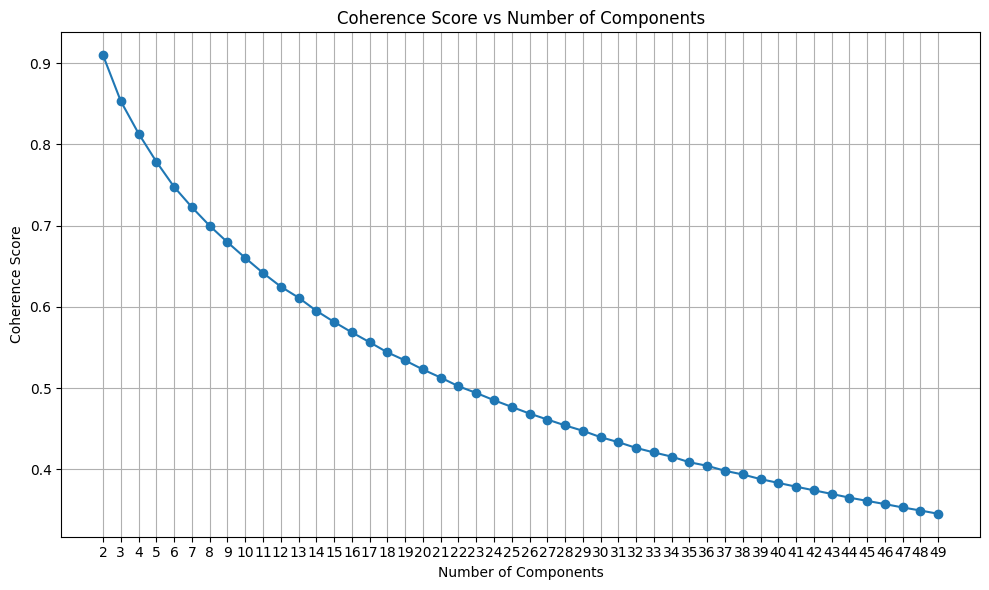

In [31]:
#Using coherence scores
# Define a range of components to test
n_components_list = range(2,50)

# Initialize a list to store coherence scores
coherence_scores = []

# Iterate over different values of n_components
for n_components in n_components_list:
    # Apply LSA (LSI)
    lsa = TruncatedSVD(n_components=n_components)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)
    
    # Calculate cosine similarity between LSA matrix and itself (could be used to measure
    # semantic coherence of the topics)
    similarity_matrix = cosine_similarity(lsa_matrix)
    
    # Calculate coherence score (e.g., mean of cosine similarities)
    coherence_score = np.mean(similarity_matrix)
    coherence_scores.append(coherence_score)

# Print coherence scores for each value of n_components
for n_components, coherence_score in zip(n_components_list, coherence_scores):
    print(f"n_components: {n_components}, Coherence Score: {coherence_score}")

# Plot coherence scores against number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, coherence_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Components')
plt.grid(True)
plt.xticks(n_components_list)
plt.tight_layout()
plt.show()


In [32]:
# Step 1: Apply LSA with 36 Components
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(df['PlusMinus'])  # Apply TF-IDF vectorization
lsa = TruncatedSVD(n_components=36)  # Initialize LSA with 10 components
lsa_matrix = lsa.fit_transform(tfidf_matrix)  # Apply LSA

# Step 2: Interpret the Components
terms = vectorizer.get_feature_names_out()  # Get the terms (words) from TF-IDF vectorizer
components = lsa.components_  # Get the components from LSA

# Print the top terms for each component
for i, component in enumerate(components):
    top_terms_idx = component.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [terms[idx] for idx in top_terms_idx]  # Get the actual terms
    print(f"Component {i+1}: {', '.join(top_terms)}")

# Step 3: Document Representation
document_vectors = lsa.transform(tfidf_matrix)  # Transform documents into LSA space

# Step 4: Document Similarity
# Assuming you want to compare documents within the year 2024 to all other years
year_2024_indices = df[df['Year'] == 2024].index  # Get indices of documents from the year 2024
other_indices = df[df['Year'] != 2024].index  # Get indices of documents from other years

# Calculate cosine similarity between documents from 2024 and other years
similarity_matrix = cosine_similarity(document_vectors[year_2024_indices], document_vectors[other_indices])

# Step 5: Application
# Example: Find the most similar document for each document from 2024
most_similar_indices = np.argmax(similarity_matrix, axis=1)  # Get indices of most similar documents
for i, index in enumerate(year_2024_indices):
    most_similar_index = other_indices[most_similar_indices[i]]
    player_2024 = df.loc[index, 'Name']
    most_similar_player = df.loc[most_similar_index, 'Name']
    print(f"Most similar document to {player_2024} (document {index} from 2024) is {most_similar_player} (document {most_similar_index}).")


Component 1: ball, defender, shot, rim, dribble, shooter, good, make, lack, need
Component 2: percent, season, ll, doesn, basket, synergy, year, college, catch, attempt
Component 3: post, perimeter, box, offensive, percent, interior, rebounder, big, lob, blocker
Component 4: post, player, screen, run, size, action, handoff, skill, offense, switch
Component 5: percent, hell, average, smart, defend, limit, guard, season, doesnt, versatility
Component 6: ball, closeout, man, straight, long, line, attacking, transition, cut, moving
Component 7: hard, screen, upside, quick, athlete, ll, feel, run, transition, space
Component 8: man, lack, point, attack, college, ups, doesnt, pull, interior, create
Component 9: man, read, floor, percent, court, rim, make, making, ability, open
Component 10: left, court, school, size, defend, half, high, player, finishing, basket
Component 11: passing, defensive, coast, nba, early, point, screen, vision, able, improved
Component 12: lack, high, shot, touch, d

In [39]:
# Step 1: Apply LSA with 36 Components
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(df['PlusMinus'])  # Apply TF-IDF vectorization
lsa = TruncatedSVD(n_components=36)  # Initialize LSA with 36 components
lsa_matrix = lsa.fit_transform(tfidf_matrix)  # Apply LSA

# Step 2: Interpret the Components
terms = vectorizer.get_feature_names_out()  # Get the terms (words) from TF-IDF vectorizer
components = lsa.components_  # Get the components from LSA

# Print the top terms for each component
for i, component in enumerate(components):
    top_terms_idx = component.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [terms[idx] for idx in top_terms_idx]  # Get the actual terms
    print(f"Component {i+1}: {', '.join(top_terms)}")

# Step 3: Document Representation
document_vectors = lsa.transform(tfidf_matrix)  # Transform documents into LSA space

# Step 4: Document Similarity
# Assuming you want to compare documents within the year 2024 to all other years
year_2024_indices = df[df['Year'] == 2024].index  # Get indices of documents from the year 2024
other_indices = df[df['Year'] != 2024].index  # Get indices of documents from other years

# Calculate cosine similarity between documents from 2024 and other years
similarity_matrix = cosine_similarity(document_vectors[year_2024_indices], document_vectors[other_indices])

# Step 5: Application
# Example: Find the top 10 most similar documents for each document from 2024
for i, index in enumerate(year_2024_indices):
    similarities = similarity_matrix[i]  # Similarity scores for the current 2024 document
    sorted_indices = np.argsort(similarities)[::-1][:10]  # Get indices of top 10 most similar documents
    top_similarities = similarities[sorted_indices]  # Get the top 10 similarity scores
    top_similar_players = df.loc[other_indices[sorted_indices], 'Name']  # Get the names of the top 10 similar players
    player_2024 = df.loc[index, 'Name']
    
    print(f"\nTop 10 players most similar to {player_2024} (document {index} from 2024):")
    for sim, player in zip(top_similarities, top_similar_players):
        print(f"{player} with similarity score: {sim:.4f}")


Component 1: ball, defender, shot, rim, dribble, shooter, good, make, lack, need
Component 2: percent, season, ll, doesn, basket, synergy, year, college, catch, attempt
Component 3: post, perimeter, box, percent, offensive, interior, rebounder, big, lob, blocker
Component 4: post, player, screen, size, run, action, handoff, skill, switch, smart
Component 5: percent, hell, average, smart, guard, defend, limit, season, doesnt, versatility
Component 6: ball, man, closeout, straight, long, attacking, transition, line, season, moving
Component 7: hard, screen, upside, athlete, ll, make, transition, capable, quick, feel
Component 8: man, attack, lack, doesnt, space, point, create, college, interior, scoring
Component 9: man, rim, read, make, smart, athleticism, percent, court, making, pass
Component 10: hell, line, defender, ball, limited, fake, aware, undersized, change, pump
Component 11: defensive, passing, coast, point, nba, early, improved, vision, screen, threat
Component 12: guard, sc

In [40]:
# Step 2: Apply LSA with 36 Components
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(df['PlusMinus'])  # Apply TF-IDF vectorization
lsa = TruncatedSVD(n_components=36)  # Initialize LSA with 36 components
lsa_matrix = lsa.fit_transform(tfidf_matrix)  # Apply LSA

# Step 3: Interpret the Components
terms = vectorizer.get_feature_names_out()  # Get the terms (words) from TF-IDF vectorizer
components = lsa.components_  # Get the components from LSA

# Print the top terms for each component
for i, component in enumerate(components):
    top_terms_idx = component.argsort()[-10:][::-1]  # Get indices of top 10 terms
    top_terms = [terms[idx] for idx in top_terms_idx]  # Get the actual terms
    print(f"Component {i+1}: {', '.join(top_terms)}")

# Step 4: Document Representation
document_vectors = lsa.transform(tfidf_matrix)  # Transform documents into LSA space

# Step 5: Document Similarity
# Assuming you want to compare documents within the year 2024 to all other years
year_2024_indices = df[df['Year'] == 2024].index  # Get indices of documents from the year 2024
other_indices = df[df['Year'] != 2024].index  # Get indices of documents from other years

# Calculate cosine similarity between documents from 2024 and other years
similarity_matrix = cosine_similarity(document_vectors[year_2024_indices], document_vectors[other_indices])

# Step 6: Calculate Weighted Average DPM
# Initialize a list to store the composite DPM scores for 2024 players
composite_dpm_scores = []

# Iterate over each 2024 player
for i, index in enumerate(year_2024_indices):
    similarities = similarity_matrix[i]  # Similarity scores for the current 2024 document
    sorted_indices = np.argsort(similarities)[::-1][:10]  # Get indices of top 10 most similar documents
    top_similarities = similarities[sorted_indices]  # Get the top 10 similarity scores
    top_similar_players = df.loc[other_indices[sorted_indices], 'Name']  # Get the names of the top 10 similar players
    top_similar_dpm = df.loc[other_indices[sorted_indices], 'DPM']  # Get the DPM values of the top 10 similar players

    # Calculate the weighted average DPM
    weighted_dpm_sum = np.sum(top_similarities * top_similar_dpm.fillna(0))  # Multiply similarity scores by DPM, handling NaN values
    similarity_sum = np.sum(top_similarities)  # Sum of similarity scores

    if similarity_sum != 0:
        weighted_avg_dpm = weighted_dpm_sum / similarity_sum  # Calculate the weighted average
    else:
        weighted_avg_dpm = np.nan  # Handle the case where there are no valid similarities

    composite_dpm_scores.append(weighted_avg_dpm)  # Store the composite score

    player_2024 = df.loc[index, 'Name']
    
    print(f"\nTop 10 players most similar to {player_2024} (document {index} from 2024):")
    for sim, player, dpm in zip(top_similarities, top_similar_players, top_similar_dpm):
        print(f"{player} with similarity score: {sim:.4f}, DPM: {dpm}")

# Add the composite DPM scores to the 2024 players' DataFrame
df_2024 = df[df['Year'] == 2024]
df_2024['Composite_DPM'] = composite_dpm_scores

# Display the result
pd.set_option('display.max_rows', None)
print(df_2024[['Name', 'Composite_DPM']])


Component 1: ball, defender, shot, rim, dribble, shooter, good, make, lack, need
Component 2: percent, season, ll, doesn, basket, synergy, year, college, catch, attempt
Component 3: post, perimeter, box, percent, offensive, interior, rebounder, big, lob, blocker
Component 4: post, player, screen, size, run, action, handoff, skill, offense, switch
Component 5: percent, hell, smart, limit, average, defend, versatility, season, guard, doesnt
Component 6: ball, man, closeout, straight, long, attacking, transition, line, season, moving
Component 7: hard, screen, upside, quick, athlete, ll, feel, capable, run, space
Component 8: man, lack, doesnt, attack, point, space, college, pull, interior, ups
Component 9: man, rim, make, read, percent, court, floor, making, smart, awareness
Component 10: high, school, size, court, left, pas, average, suffered, half, athlete
Component 11: defensive, passing, nba, point, doesnt, coast, improved, threat, screen, vision
Component 12: shot, lack, fake, high,

C:\Users\btrok\AppData\Local\Temp\ipykernel_30448\2945487746.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Composite_DPM'] = composite_dpm_scores


In [37]:
# Sort the DataFrame by 'Composite_DPM' in descending order and then print it
df_2024_sorted = df_2024[['Name', 'Composite_DPM']].sort_values(by='Composite_DPM', ascending=False)

# Display the sorted DataFrame
print(df_2024_sorted)

                      Name  Composite_DPM
433             yves missi       0.269086
439          bobi klintman       0.153924
472            jamal shead       0.123689
449           oso ighodaro       0.105067
431       tristan da silva       0.063410
480            judah mintz      -0.010741
473                pj hall      -0.068733
432            kel'el ware      -0.081553
436         ulrich chomche      -0.100972
456       cameron christie      -0.108806
474              adem bona      -0.124486
419          reed sheppard      -0.178148
463           izan almansa      -0.205795
466           alex karaban      -0.331152
453          melvin ajinca      -0.341247
470           dillon jones      -0.362502
420        donovan clingan      -0.412829
434              zach edey      -0.469285
461         keshad johnson      -0.487202
415         stephon castle      -0.533169
478            baba miller      -0.536990
469         tristen newton      -0.541882
425           devin carter      -0